# Analyzing *DonationsC5LA.xlsx* 'Amount'

## Goals of Analysis:
1. Understand the distribution of the amount donated, identifying any outliers.
2. Compare statistics between donors with null and non-null zip codes.
- Determine how many null values exist.
- Assess if null values differ significantly in amount donated, including outlier analysis.
- Visualize the data through histograms.

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load Data
df = pd.read_excel('DonationsC5LA.xlsx')
df.head()

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount
0,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.00
1,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.00
2,1,NaN,Closed Won,Household,90069,Q3-2019,7/17/2019,5000028.69
3,1,NaN,Closed Won,Household,90069,Q1-2019,3/12/2019,320000.00
4,1,NaN,Closed Won,Household,90069,Q2-2020,4/27/2020,220000.00


## Analyze the 'Amount' Column

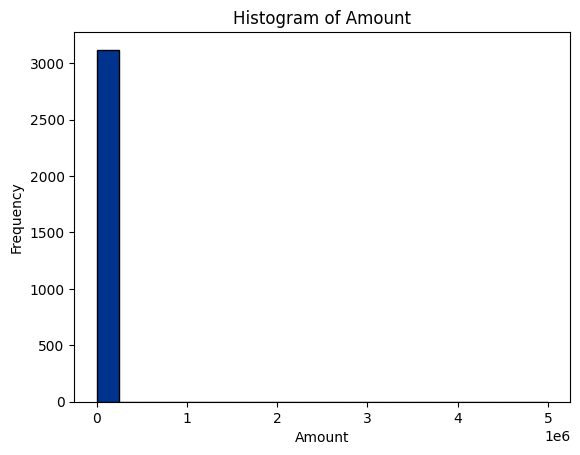

Statistics for the 'Amount' column:
count      3122.00
mean       3589.24
std       90399.37
min        -200.00
25%         100.00
50%         250.00
75%        1000.00
max     5000028.69
Name: Amount, dtype: float64


In [19]:
# Create a Histogram of the 'Amount' Column
plt.hist(df['Amount'], bins=20, color='#00338D', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

# Calculate and Display Descriptive Statistics for the 'Amount' Column
amount_stats = df['Amount'].describe()
print("Statistics for the 'Amount' column:")
print(amount_stats)

### Identify Outliers in the 'Amount' Column

In [20]:
# Calculate the Interquartile Range (IQR)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds for Outlier Detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Outliers in the 'Amount' column:")
print(outliers)

Outliers in the 'Amount' column:
      Masked Account ID Maked Primary Campaign       Stage Account Type  \
0                     1                    NaN  Closed Won    Household   
1                     1                    NaN  Closed Won    Household   
2                     1                    NaN  Closed Won    Household   
3                     1                    NaN  Closed Won    Household   
4                     1                    NaN  Closed Won    Household   
...                 ...                    ...         ...          ...   
3093                 12      Campaign Two 2023     Awarded    Household   
3094                 18      Campaign Two 2023  Closed Won    Corporate   
3100                184      Campaign Two 2023  Closed Won    Corporate   
3102                228      Campaign Two 2023  Closed Won    Corporate   
3103                245      Campaign Two 2023  Closed Won    Household   

     Billing Zip/Postal Code Fiscal Period Close Date     Amount  

### Removing Outliers from the Data


Statistics for the 'Amount' column after removing outliers:
count   2703.00
mean     334.66
std      383.16
min     -200.00
25%       87.49
50%      200.00
75%      500.00
max     2300.00
Name: Amount, dtype: float64


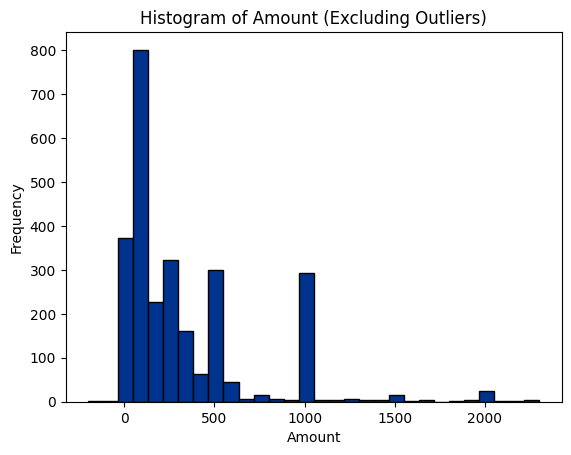

In [22]:
# Filter DataFrame to Exclude Outliers
filtered_df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Print Statistics After Removing Outliers
print("\nStatistics for the 'Amount' column after removing outliers:")
print(filtered_df['Amount'].describe())

# Create a Histogram for the Filtered 'Amount' Column (Excluding Outliers)
plt.hist(filtered_df['Amount'], bins=30, color='#00338D', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount (Excluding Outliers)')
plt.show()

### Analyzing Null vs Non-null Zip Codes

Number of rows with null 'Billing Zip/Postal Code': 501

Statistics for the 'Amount' column (Null 'Billing Zip/Postal Code'):
count     501.00
mean      610.02
std      1735.76
min         1.00
25%        50.00
50%       103.50
75%       500.00
max     20000.00
Name: Amount, dtype: float64


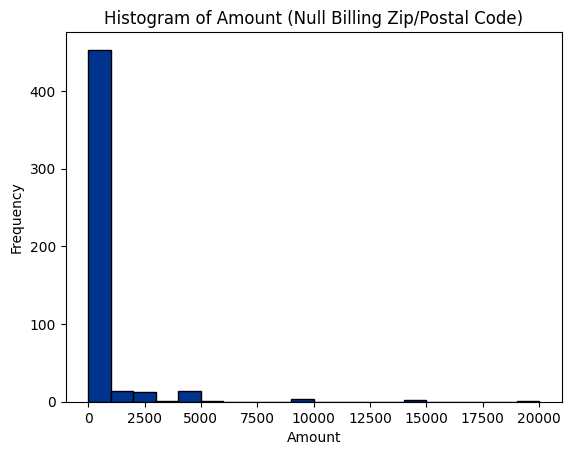

Number of rows with non-null 'Billing Zip/Postal Code': 2621

Statistics for the 'Amount' column (Non-null 'Billing Zip/Postal Code'):
count      2621.00
mean       4158.72
std       98651.50
min        -200.00
25%         100.00
50%         250.00
75%        1000.00
max     5000028.69
Name: Amount, dtype: float64


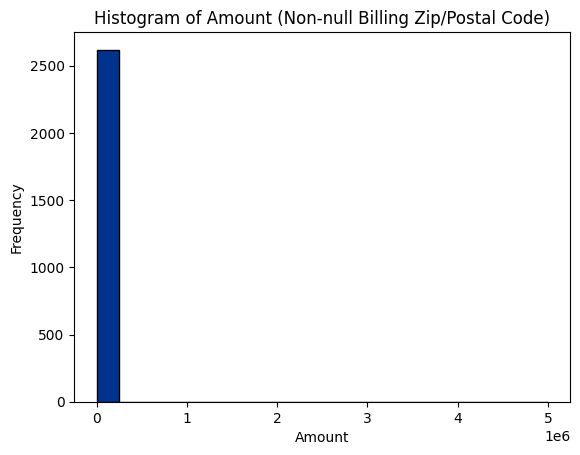

In [23]:
# Filter for Rows with Null 'Billing Zip/Postal Code'
null_zipcode_df = df[df['Billing Zip/Postal Code'].isnull()]
print(f"Number of rows with null 'Billing Zip/Postal Code': {len(null_zipcode_df)}")

# Print Statistics for 'Amount' Column with Null 'Billing Zip/Postal Code'
print("\nStatistics for the 'Amount' column (Null 'Billing Zip/Postal Code'):")
print(null_zipcode_df['Amount'].describe())

# Create a Histogram for 'Amount' Column Where 'Billing Zip/Postal Code' is Null
plt.hist(null_zipcode_df['Amount'], bins=20, color='#00338D', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount (Null Billing Zip/Postal Code)')
plt.show()

# Filter for Rows with Non-null 'Billing Zip/Postal Code'
not_null_zipcode_df = df[df['Billing Zip/Postal Code'].notnull()]
print(f"Number of rows with non-null 'Billing Zip/Postal Code': {len(not_null_zipcode_df)}")

# Print Statistics for 'Amount' Column with Non-null 'Billing Zip/Postal Code'
print("\nStatistics for the 'Amount' column (Non-null 'Billing Zip/Postal Code'):")
print(not_null_zipcode_df['Amount'].describe())

# Create a Histogram for 'Amount' Column Where 'Billing Zip/Postal Code' is Not Null
plt.hist(not_null_zipcode_df['Amount'], bins=20, color='#00338D', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount (Non-null Billing Zip/Postal Code)')
plt.show()

##